In [1]:
import sys
sys.path.append('/Users/nwilming/u')
import cPickle
from conf_analysis.pupil import pupil, patsy_transforms as pt
from conf_analysis.behavior import empirical
from pylab import *
import seaborn as sns
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
sns.set_style('ticks')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = empirical.data_cleanup(empirical.load_data())

In [3]:
data_jw = empirical.load_jw()

In [4]:
#data_jw = data_jw.query('blinks_nr==0')

In [5]:
print data_jw.columns
side = (data_jw.response == data_jw.correct).values
assert all((side==data_jw.response)==data_jw.correct)
side = (side-0.5)*2
data_jw.loc[:, 'side']=side
data_jw.loc[:, 'response'] = (data_jw.response.values-0.5)*2
data_jw.loc[:, 'contrast'] = 10**data_jw.loc[:, 'contrast'].values

Index([u'blinks_nr', u'confidence', u'contrast', u'correct', u'noise_redraw',
       u'present', u'pupil_b', u'pupil_d', u'choice_rt', u'block_num',
       u'sacs_nr', u'session_num', u'staircase', u'snum', u'trial',
       u'response'],
      dtype='object')


In [6]:
data_jw.loc[:, 'confsplit'] =  data_jw.confidence>1

/Users/nwilming/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


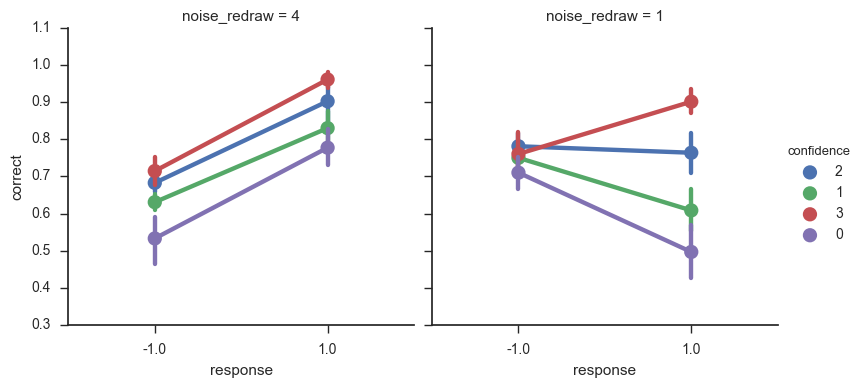

In [7]:
sns.factorplot(data=data_jw, y='correct', x='response', units='snum', hue='confidence', col='noise_redraw', ci=95)

In [8]:
d = data_jw.groupby(['snum', 'response', 'noise_redraw', 'confidence']).size()
m = data_jw.groupby(['snum', 'response', 'noise_redraw']).size()

k = d.reset_index().set_index(['snum', 'response', 'noise_redraw'])[0]/m.reset_index().set_index(['snum', 'response', 'noise_redraw'])[0]
d = pd.concat((d.reset_index().set_index(['snum', 'response', 'noise_redraw']), k), axis=1)
d.columns=['confidence', 'total', 'confperc']
d = d.reset_index().set_index(['snum', 'response', 'noise_redraw', 'confidence'])

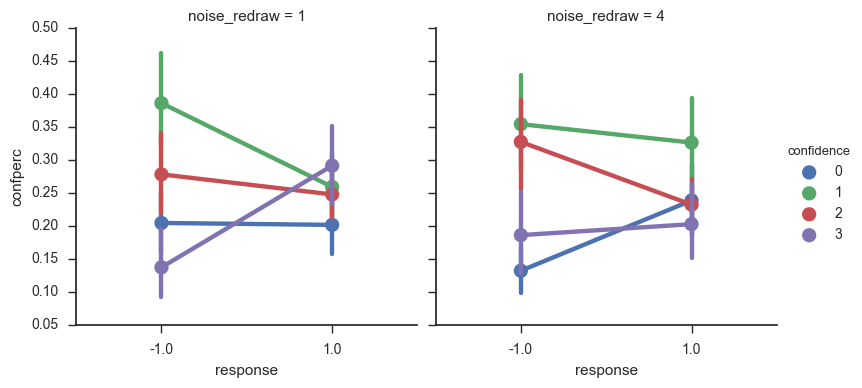

In [9]:
sns.factorplot(x='response', y='confperc', col='noise_redraw', hue='confidence', data=d.reset_index())

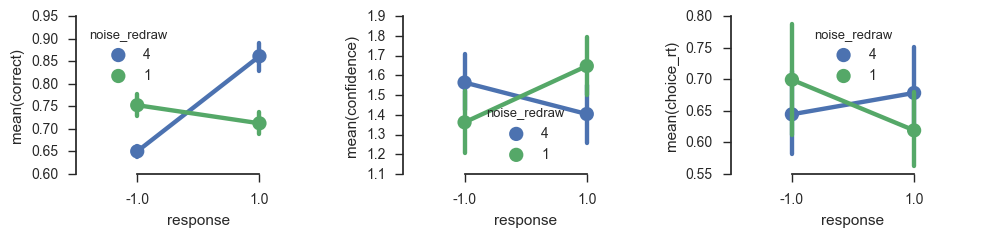

In [10]:
figure(figsize=(10, 2.5))
subplot(1,3,1)
sns.pointplot(data=data_jw, y='correct', x='response', units='snum', hue='noise_redraw', ci=95)
#gca().legend_.remove()
subplot(1,3,2)
sns.pointplot(data=data_jw, y='confidence', x='response', units='snum', hue='noise_redraw', ci=95)
#gca().legend_.remove()
subplot(1,3,3)
sns.pointplot(data=data_jw, y='choice_rt', x='response', units='snum', hue='noise_redraw', ci=95)
sns.despine(trim=True)
tight_layout()

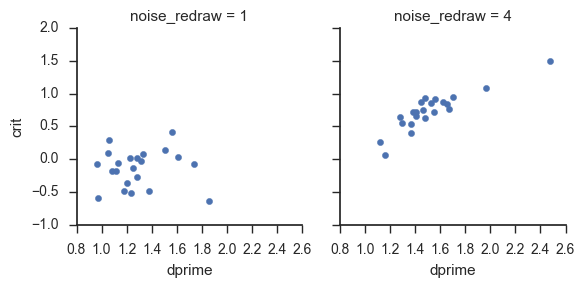

In [11]:
sdt = pd.concat(
        (data_jw.groupby(['snum', 'noise_redraw'])
           .apply(empirical.crit),
         data_jw.groupby(['snum', 'noise_redraw'])
           .apply(empirical.dp)), axis=1)
sdt.columns=['crit', 'dprime']

g = sns.FacetGrid(sdt.reset_index(), col="noise_redraw")
g.map(scatter, 'dprime', 'crit')


In [12]:
def foo(x):
    x.loc[:, 'block_num'] -= x.loc[:, 'block_num'].min()
    return x
data_jw = data_jw.groupby(['snum', 'session_num']).apply(foo)
data_jw.loc[:, 'bnum'] = 5*(data_jw.session_num-1) + data_jw.block_num

for c, sub in data_jw.groupby('snum'):
    print c, unique(sub.query('session_num==1').block_num), unique(sub.query('session_num==2').bnum)

0 [0 1 2 3 4] [5 6 7 8 9]
1 [0 1 2 3 4] [5 6 7 8 9]
2 [0 1 2 3 4] [5 6 7 8 9]
3 [0 1 2 3] [5 6 7 8]
4 [0 1 2 3 4] [5 6 7 8 9]
5 [0 1 2 3] [5 6 7 8 9]
6 [0 1 2 3] [5 6 7 8 9]
7 [0 1 2 3 4] [ 5  6  7  8  9 10]
8 [0 1 2 3 4] [5 6 7 8 9]
9 [0 1 2 3] [5 6 7 8 9]
10 [0 1 2 3] [5 6 7 8]
11 [0 1 2 3 4] [5 6 7 8]
12 [0 1 2 3] [5 6 7 8 9]
13 [0 1 2 3] [5 6 7 8 9]
14 [0 1 2 3 4] [5 6 7 8 9]
15 [0 1 2] [5 6 7 8 9]
16 [0 1 2 3] [5 6 7 8 9]
17 [0 1] [5 6 7 8 9]
18 [0 1 2 3 4] [5 6 7 8 9]
19 [0 1 2 3 4] [5 6 7 8 9]
20 [0 1 2 3 4] [5 6 7 8]
21 [0 1 2 3 4] [5 6 7 8 9]


In [13]:
sdt = pd.concat(
        (data_jw.groupby(['snum', 'noise_redraw', 'bnum'])
           .apply(empirical.crit),
         data_jw.groupby(['snum', 'noise_redraw', 'bnum'])
           .apply(empirical.dp),
         data_jw.groupby(['snum', 'noise_redraw', 'bnum'])
           .correct.mean(),
         data_jw.groupby(['snum', 'noise_redraw', 'bnum'])
           .contrast.mean(),
         data_jw.groupby(['snum', 'noise_redraw', 'bnum'])
           .choice_rt.mean(), 
        data_jw.groupby(['snum', 'noise_redraw', 'bnum'])
           .confidence.mean()), axis=1)
sdt.columns=['crit', 'dprime', 'correct', 'contrast', 'choice_rt', 'confidence']
sdt = sdt.reset_index()

In [14]:
print sdt.head()

   snum  noise_redraw  bnum      crit    dprime   correct  contrast  \
0     0             1     0 -0.743794  0.850309  0.634921  0.011903   
1     0             1     1 -0.292170  0.812711  0.656250  0.011089   
2     0             1     2  0.473223  0.870470  0.656250  0.011712   
3     0             1     3  0.397136  1.022643  0.687500  0.011864   
4     0             1     4  0.704920  0.963824  0.656250  0.011893   

   choice_rt  confidence  
0   0.420937    1.714286  
1   0.444344    1.703125  
2   0.433047    1.562500  
3   0.399766    1.984375  
4   0.374656    1.843750  


/Users/nwilming/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


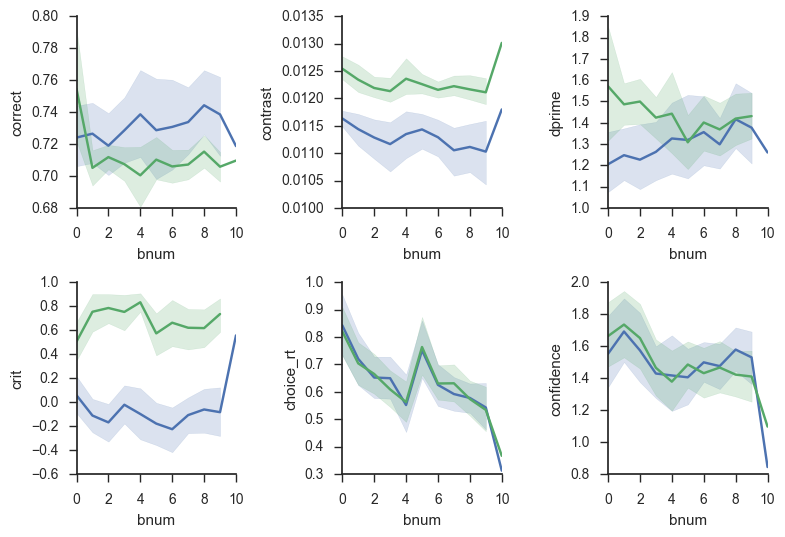

In [15]:

sdt.loc[isinf(sdt.dprime), ('dprime', 'crit')] = nan
for i, field in enumerate(['correct', 'contrast', 'dprime', 'crit', 'choice_rt', 'confidence']):
    subplot(2,3, i+1)
    sns.tsplot(sdt.groupby(['bnum', 'snum', 'noise_redraw'])[field].agg(nanmean).reset_index(), 
               time='bnum', value=field, unit='snum', condition='noise_redraw', 
               estimator=nanmean, ci=[95]) 
    gca().legend_.remove()
sns.despine(trim=True)
tight_layout()

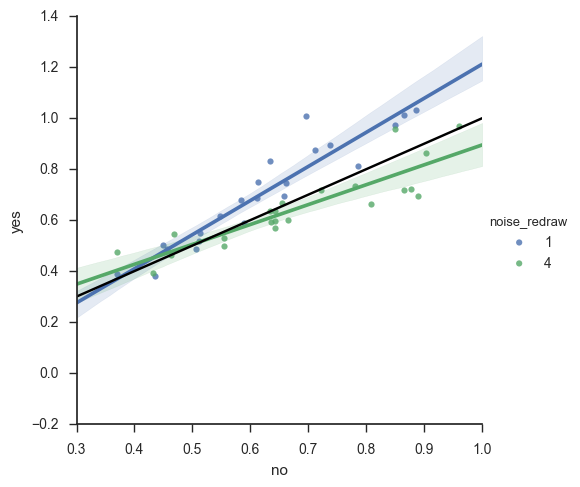

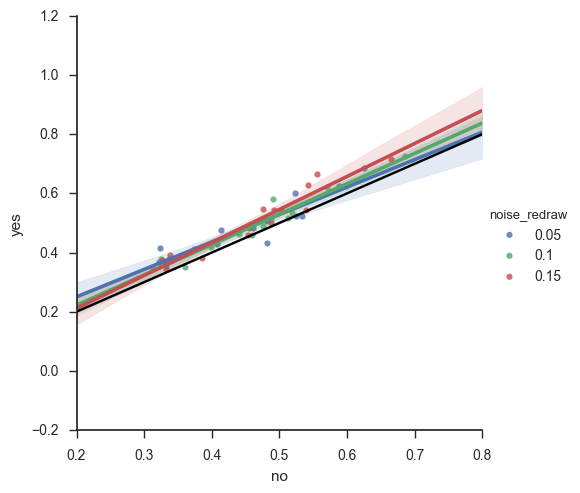

In [57]:
rtdata = data_jw.groupby(['response', 'snum', 'noise_redraw']).choice_rt.mean().unstack('response').reset_index()
rtdata.columns= ['snum', 'noise_redraw', 'yes', 'no']

sns.lmplot(x="no", y="yes", hue="noise_redraw", data=rtdata)
plot([0, 1], [0 ,1], 'k')

rtdata = data.groupby(['response', 'snum', 'noise_sigma']).choice_rt.mean().unstack('response').reset_index()
rtdata.columns= ['snum', 'noise_redraw', 'yes', 'no']
sns.lmplot(x="no", y="yes", hue="noise_redraw", data=rtdata)
plot([0, 1], [0 ,1], 'k')

(array([  2.,   2.,   7.,  10.,   8.,   6.,   6.,   2.,   0.,   1.]),
 array([-0.19676447, -0.14603939, -0.0953143 , -0.04458922,  0.00613587,
         0.05686095,  0.10758604,  0.15831112,  0.20903621,  0.25976129,
         0.31048638]),
 <a list of 10 Patch objects>)

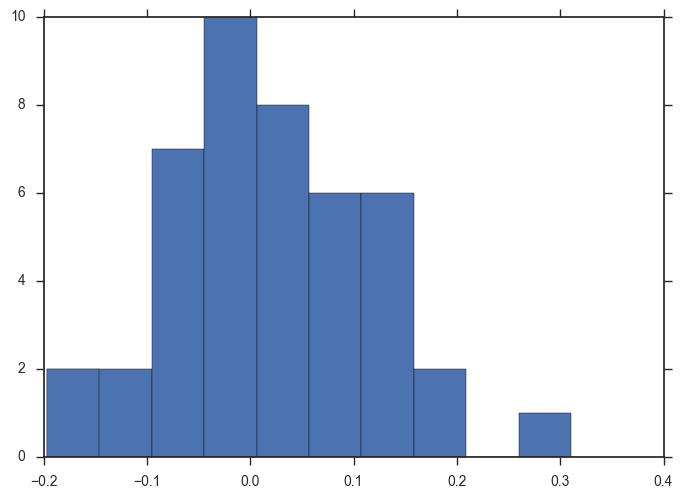

In [31]:
hist(rts.unstack('response')[-1]-rts.unstack('response')[1])